In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn import linear_model

# Machine Learning
Machine learning is a powerful tool for approximating complex functions from data. Let's consider a scenario where we have a dataset consisting of pairs of feature variables $\mathbf{X}$ and target variable $y$. Our goal is to learn the unknown function $F(\mathbf{X})$ that maps features to targets. We have:
$$y = F(\mathbf{X})$$

In machine learning, we often represent our learned function $f$ as a model with parameters $\theta$. The purpose of training a machine learning model is to learn these parameters $\theta$ and ultimately approximate the true relationship $F$ between the features and the target. When our model is trained, we refer to the output as 'predicted values' $\hat{y}$, not to be mistaken with the actual values $y$. We have:

$$ \hat{y} = f(\mathbf{X}; \theta)$$

Feature variables, also known as attributes or predictor variables capture different aspects or characteristics of the data that we believe are relevant for predicting the target variable. For example, in a dataset of housing prices, feature variables could include square footage, number of bedrooms, location, etc. These features help us build a model that can predict the price of a house based on its characteristics.

To evaluate the performance of our model, we typically split our dataset into two subsets: training data and testing data. The training data is used to train the model (learn parameters $\theta$), while the testing data is used to evaluate how well the model generalizes to new unseen observations. During training the model musn't know anything about the testing data. 

## Regression
For regression machine learning problems, we treat $y,\hat{y}$ as a continuous variable.

#### Linear Regression
Linear regression is simple machine learning model which involves the treatment of $f$ as a linear combination of the features $x$. Therefore, we may train the model to learn the coefficients $\theta$ of the function:

$$\hat{y} = f(\mathbf{X}; \theta) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$$

Here, $\theta_0, \theta_1, \dots, \theta_n$ are the parameters of the model, and $x_1, x_2, \dots, x_n$ are the feature variables.
#### Linear Regression Example: 
In the following example we will use linear regression to predict a quantitative measure of diabetes disease progression based on age, sex, bmi, blood pressure and six blood serum measurements s1 to s6 in sklearn's diabetes dataset.

In [2]:
diabetes = load_diabetes()
print(f"Number of data samples: {diabetes.target.shape[0]}")
print(f"Number of potential feature variables: {diabetes.data.shape[1]}")
print(f"Feature variable names: {diabetes.feature_names}")

Number of data samples: 442
Number of potential feature variables: 10
Feature variable names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


Number of training samples: 265
Number of testing samples: 177
Learned parameters 𝜃_0: 153.06667237581786, 𝜃_1: 734.4964078049925


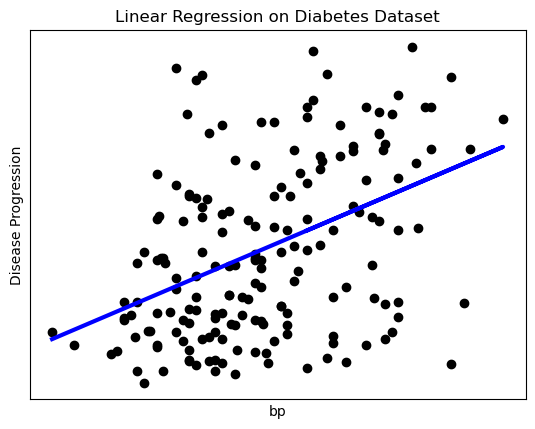

In [3]:
def single_variable_linear_regression(dataset, predictor_label):
    i = dataset.feature_names.index(predictor_label)
    X = dataset.data[:,i]
    y = dataset.target

    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size = 0.4, random_state=5)
    print(f"Number of training samples: {Xtr.shape[0]}")
    print(f"Number of testing samples: {Xte.shape[0]}")

    # Create linear regression object
    f = linear_model.LinearRegression()
    # Train the model using the training sets
    f.fit(Xtr.reshape(-1,1), ytr)

    yte_predicted = f.predict(Xte.reshape(-1,1))
    ytr_predicted = f.predict(Xtr.reshape(-1,1))

    # Learned parameters
    print(f"Learned parameters 𝜃_0: {f.intercept_}, 𝜃_1: {f.coef_[0]}")

    plt.scatter(Xte, yte, color="black")
    plt.plot(Xte, yte_predicted, color="blue", linewidth=3)
    plt.xlabel(predictor_label)
    plt.ylabel("Disease Progression")
    plt.title("Linear Regression on Diabetes Dataset")
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
    return ytr, yte, ytr_predicted, yte_predicted
    
# Feature variable options:
#age age in years
#sex
#bmi body mass index
#bp average blood pressure
#s1 tc, total serum cholesterol
#s2 ldl, low-density lipoproteins
#s3 hdl, high-density lipoproteins
#s4 tch, total cholesterol / HDL
#s5 ltg, possibly log of serum triglycerides level
#s6 glu, blood sugar level

ytr, yte, ytr_pred, yte_pred = single_variable_linear_regression(diabetes, 'bp')


### Regression Model Evaluation

To evaluate our model we measure the difference between predicted $\hat{y}$ and actual $y$ target values. There are many ways to do this depending on the prediction task. Here are some common examples:

##### Mean squared error (MSE) 
$$MSE = \frac{1}{n} \sum_{}^{n}(y - \hat{y})^2$$
##### Mean absolute error (MAE)
$$MAE = \frac{1}{n} \sum_{}^{n}|y - \hat{y}|$$
##### Mean absolute percentage error (MAPE)
$$MAPE = \frac{100\%}{n} \sum_{}^{n}\left|\frac{y - \hat{y}}{y}\right|$$
##### Residual mean squared error (RMSE)
$$RMSE = \sqrt{\frac{\sum_{}^{n}(y - \hat{y})^2}{n}}$$

In [4]:
regression_metrics = [mean_squared_error, mean_absolute_error, mean_absolute_percentage_error]
for met in regression_metrics:
    print(f"Test {met.__name__}: %.2f" % met(yte, yte_pred))
    print(f"Train {met.__name__}: %.2f" % met(ytr, ytr_pred))

print(f"Test RMSE: %.2f" % mean_squared_error(yte, yte_pred, squared=False))
print(f"Train RMSE: %.2f" % mean_squared_error(ytr, ytr_pred, squared=False))

Test mean_squared_error: 5152.24
Train mean_squared_error: 4524.48
Test mean_absolute_error: 58.77
Train mean_absolute_error: 55.98
Test mean_absolute_percentage_error: 0.57
Train mean_absolute_percentage_error: 0.52
Test RMSE: 71.78
Train RMSE: 67.26


## Classification

The goal of classification is to predict the category or class label $\hat{y}$ based on input data $X$. We now treat $y$ and $\hat{y}$ as discrete class labels, e.g animals (cat, dog, bird, fish). 

There are many different ways to formalize machine learning classification. Since we will be working towards development of large language models we will adopt a softmax-based formalization since it is commonly used in neural networks.

We may still assume that the training process learns the parameters $\theta$ for the function $f(\textbf{X};\theta)$, only now $f: \textbf{X} \rightarrow \textbf{R}^{m}$ where there are $m$ possible class labels and we introduce additional post-processing operations to map $f$ to a class label $\hat{y}$. 

We may denote $\textbf{z}=(z_1,z_2,..,z_m)=f(\textbf{X};\theta)$. Each $z_i$ represents the 'logits' which are raw unormalized scores. Logits have some positive correlation with the probability of $\hat{y}$ belonging to class $i$. We apply the softmax function to transform these logits into a probability distribution.
$$ softmax(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{m}e^{z_j}}$$
After calculating the softmax probabilities we select the class with the highest probability as our predicted class label:
$$ \hat{y} = argmax_i(softmax(z_i))$$

#### Multi-layer Perceptron (MLP)
This is a type of machine learning algorithm which uses a neural network to either perform regression or classification tasks. We will go into more depth on neural networks in future lessons.

#### MLP Classification Example:
We use a multi-layer-perceptron (MLP) neural network architecture to classify iris flower species based on sepal and petal proportions in sklearn's iris dataset.

![Alt Text](iris_flowers.png)


In [5]:
iris = load_iris()
print(f"Number of data samples: {iris.target.shape[0]}")
print(f"Number of potential feature variables: {iris.data.shape[1]}")
print(f"Feature variable names: {iris.feature_names}")
print(f"Target class labels: {iris.target_names}")

np.random.seed(1)

def add_noise(data, noise_level):
    feature_ranges = np.ptp(data, axis=0)  # Peak-to-peak (maximum - minimum) along the given axis
    # Generate random noise with the same shape as the dataset
    noise = np.random.uniform(low=-noise_level * feature_ranges, high=noise_level * feature_ranges, size=data.shape)

    # Add noise to the dataset
    iris.data = iris.data + noise
    return iris.data

#iris.data = add_noise(iris.data, 0.5)

Number of data samples: 150
Number of potential feature variables: 4
Feature variable names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target class labels: ['setosa' 'versicolor' 'virginica']


Number of training samples: 120
Number of testing samples: 30
Accuracy: 1.0


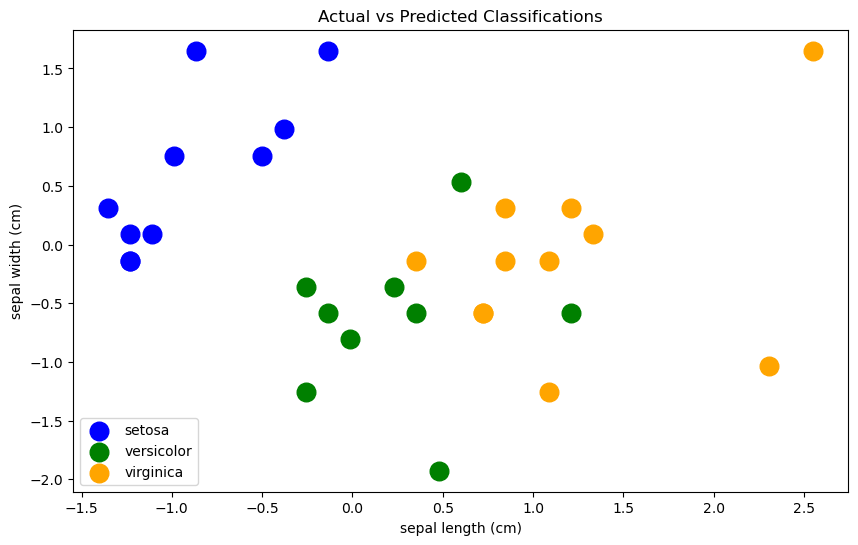

In [6]:
X, y = iris.data, iris.target
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Number of training samples: {Xtr.shape[0]}")
print(f"Number of testing samples: {Xte.shape[0]}")

scaler = StandardScaler()
Xtr = scaler.fit_transform(Xtr)
Xte = scaler.transform(Xte)

clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

#overfitting the noise
#clf = MLPClassifier(hidden_layer_sizes=(400,), activation='relu', solver='adam', max_iter=1000, random_state=42)

#ignoring the noise
#clf = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=1000, random_state=42)

clf.fit(Xtr, ytr)

# Predict the class labels for the testing set
yte_pred = clf.predict(Xte)
ytr_pred = clf.predict(Xtr)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(yte, yte_pred)
print("Accuracy:", accuracy)
feature_names = iris.feature_names
x_feature_index = 0  # Index of the first feature
y_feature_index = 1  # Index of the second feature
# Plot the data
cmap = ['blue', 'green', 'orange']
plt.figure(figsize=(10, 6))
for class_label in np.unique(y):
    X_class = Xte[yte == class_label]
    plt.scatter(X_class[:, x_feature_index], X_class[:, y_feature_index], label=iris.target_names[class_label], color=cmap[class_label], s=180)

# Plot the predicted labels
for class_label in np.unique(y):
    X_class = Xte[yte_pred == class_label]
    plt.scatter(X_class[:, x_feature_index], X_class[:, y_feature_index], color=cmap[class_label], s=50)

plt.xlabel(feature_names[x_feature_index])
plt.ylabel(feature_names[y_feature_index])
plt.title('Actual vs Predicted Classifications')
plt.legend()
plt.show()

### Classification Model Evaluation

Explanation of classification evaluation metrics is best done using a binary classification problem.
Here are some recommended resources:
https://medium.com/@impythonprogrammer/evaluation-metrics-for-classification-fc770511052d

https://www.youtube.com/watch?v=vP06aMoz4v8

https://www.youtube.com/watch?v=Kdsp6soqA7o


Test accuracy: 1.0
Train accuracy: 0.9833333333333333

Train precision: 0.9833229101521784
Test precision: 1.0
Train recall: 0.9833229101521784
Test recall: 1.0
Train f1 score: 0.9833229101521784
Test f1 score: 1.0


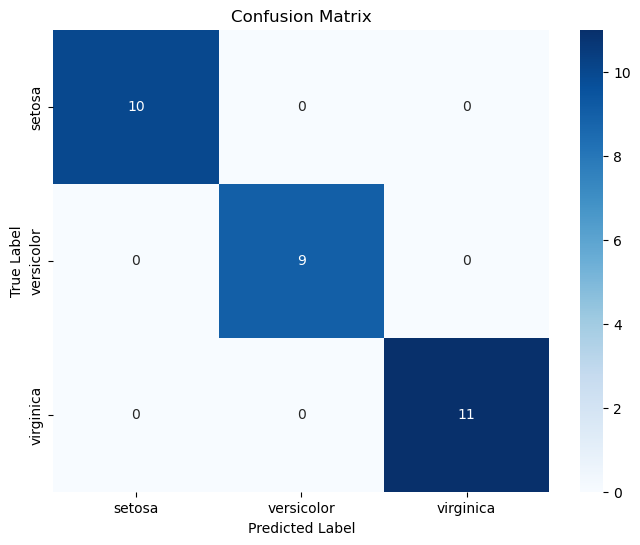

In [7]:
print(f"Test accuracy: {accuracy_score(yte, yte_pred)}")
print(f"Train accuracy: {accuracy_score(ytr, ytr_pred)}\n")
print(f"Train precision: {precision_score(ytr, ytr_pred, average='macro')}")
print(f"Test precision: {precision_score(yte, yte_pred, average='macro')}")
print(f"Train recall: {recall_score(ytr, ytr_pred, average='macro')}")
print(f"Test recall: {recall_score(yte, yte_pred, average='macro')}")  
print(f"Train f1 score: {f1_score(ytr, ytr_pred, average='macro')}")
print(f"Test f1 score: {f1_score(yte, yte_pred, average='macro')}")  

conf_matrix = confusion_matrix(yte, yte_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Bias-Variance Tradeoff


##### Bias: 
the difference between the predicted values of our model and the actual values. 

##### Variance: 
the 'spread' of the model's predictions. 
![Alt Text](bias_variance.png)



The training method should ensure **low bias** to avoid **underfitting**. Underfitting is failing to learn key characteristics of our data, we observed underfitting in the linear regression example. Although, when the bias is very low on the training data this could potentially be a result of **overfitting** to the training data. Overfitting is our model over-analysing the training data, learning unimportant characterstics (e.g random noise) which result in the model performing poorly on unseen testing data.

The training method should also ensure **low variance** to avoid **overfitting** due to learning an overly complex model. At the same time, the training method doesn't want variance to be too low as this results **underfitting** due to the model being to simple (e.g linear regression).

![Alt Text](bias_variance_tradeoff_2.jpg)


When we train a model we aim to balance the bias-variance tradeoff to ensure that our model generalizes well to unseen data. The following graph illustrates the optimal region between the overfitting and underfitting zones. To avoid confusion, think of the axes labels as very vague/general ideas. On the x-axis, model complexity may represent 'the number of facts' that the model learns about the training data. On the y-axis, error refers to any notion of poor performance: e.g high variance, high bias, the difference between predicted vs actual testing targets.

![Alt Text](bias_variance_tradeoff.jpg)


Further resources on bias-variance tradeoff: 

https://www.geeksforgeeks.org/ml-bias-variance-trade-off/?ref=leftbar-rightbar

https://www.youtube.com/watch?v=EuBBz3bI-aA